# Data Mining and Big Data Analytics: Models for classification

## Taguhi Hakobyan:
### Central European University





#  Introduction

1. We are expolring data **wine.csv**. This datasets contains the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis quantified 13 different properties of the three types of wines. 

    The features represent the following properties:

    1. Alcohol content
    2. Malic acid content
    3. Ash content
    4. Alcalinity of ash 
    5. Magnesium content
    6. Total phenol content 
    7. Flavanoid content 
    8. Nonflavanoid phenol content 
    9. Proanthocyanin content 
    10. Color intensity 
    11. Hue 
    12. OD280/OD315 absorbance of diluted wines 
    13. Proline concentration 

    The first column (target variable) contains the information about the three different cultivars marked by 0, 1, and 2. 

    The goal of this part is to explore the features space to identify potential issues and instruct the pre-processing phase, e.g., normalization, missing values.
    At first I will explore the data to find out which parameters of the data are more/less diverse. I will rank the features based on their relative variances of their distribution, and will plot the correlations between certain variables. 
    

   

# Section 1: Data description

In [1]:
import pandas

In [2]:
import numpy as np
%matplotlib inline

In [3]:
from pylab import *
from matplotlib.patches import Polygon


In [5]:
 # Import the libraries we will be using
import os
import numpy as np
import matplotlib.pylab as plt
from IPython.display import Image
# import graphviz 

import sklearn

%matplotlib inline

Below the data is presented in the table format. The first column reperesents the target data: the class of the wine labeled as 1,2 and 3. The other colums are the characterictics of the corresponding type of the wine.  

In [6]:
df = pandas.read_csv('wine.csv')
df


,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


We have in total 178 data with 13 characteristics.

In [8]:
X=df.drop('wine', axis=1)
y=df.wine

#Y=df.wine.as_matrix
#x=df.drop('wine', axis=1).as_matrix

In [9]:
df.groupby(['wine']).agg('mean')

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
wine,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


From the mean table above, we see on average level of each characteristics for each type of wine. Notice, the level of Proline is almost a double for the 1st type of wine, than for the others, same for "OD280/OD315 of diluted wines". The difference for other characteristics is not that prominent from this table.

Let's name "0", "1","2" the types of the wine, and take the features name leave the same. 

In [10]:
X_target_names=["0", "1","2"]
print(X_target_names)

['0', '1', '2']


In [11]:
X_feature_names=X.columns.values
print(X_feature_names)

['Alcohol' 'Malic acid' 'Ash' 'Alcalinity of ash' 'Magnesium'
 'Total phenols' 'Flavanoids' 'Nonflavanoid phenols' 'Proanthocyanins'
 'Color intensity' 'Hue' 'OD280/OD315 of diluted wines' 'Proline ']


Below the histogram for the feature 'Ash' is presented. Note, the mean is around 2.5, similar to the result obtained in the table with means.
We won't plot separatelly for other features. 

No handles with labels found to put in legend.


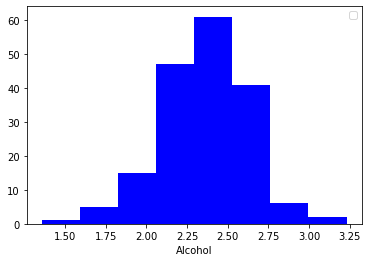

In [12]:
# the histogram for the feature "Ash".
feature_index = 0
plt.hist(df.Ash, 8,
             color='blue')
plt.xlabel(X_feature_names[feature_index])
plt.legend(loc='upper right')
plt.show()

Also it makes sense to plot the scatter matrix. The blue graphs will represent the histograms for a related feature, while the red ones are the scatter plotes. This graph gives a general understanding about the distribution and variances of a certain features of the wines. Also, it visually helps to determine which features are most likely to be correlated. Obviously, the scatter matrix is symmeteric. From the first glance, is seems like "Alcohol" and "Proline" seem to be correlated, while "Ash" doesn't seem to be correlated with any of the features. 

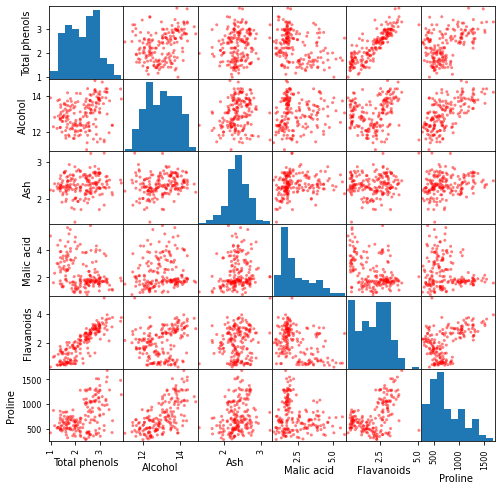

In [13]:
pandas.plotting.scatter_matrix(df[['Total phenols','Alcohol','Ash', 'Malic acid','Flavanoids','Proline ']],
                               figsize=(8,8), color='red');

Below, the features are ranked based on their relative variance (variance divided by the mean of the set). 

In [14]:
print((df.mean()/df.var()).sort_values(axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last'))

Proline                          0.007532
Magnesium                        0.488955
Color intensity                  0.941136
Alcalinity of ash                1.748004
Malic acid                       1.872051
Flavanoids                       2.033910
wine                             3.226684
Proanthocyanins                  4.856303
OD280/OD315 of diluted wines     5.181027
Total phenols                    5.859519
Hue                             18.326159
Alcohol                         19.725931
Nonflavanoid phenols            23.362547
Ash                             31.442614
dtype: float64


The correlation between the features. The colors represent the degree of correlation between the features. For example, the white collor represent the correlation of degree one (the ones in the diagonal ), while almost blue color shows that features have close to -1 correlation. 

<AxesSubplot:>

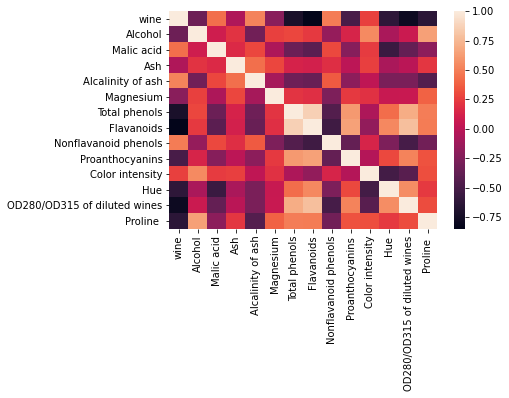

In [15]:
import seaborn as sns
corr_of_features = df.corr()
sns.heatmap(corr_of_features, 
            xticklabels=corr_of_features.columns.values,
            yticklabels=corr_of_features.columns.values, annot=False)

Below, we also present the correlation matrix of the features. 

In [16]:
corr_of_features
# print(corr_of_features)
#print(max(corr_of_features))

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
wine,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


<br><br>




# Section 2: The Decision Tree

In this section I will develop a model called the Decision Tree Classifier, to predict the type of a wine, when given only the characteritics of that wine. The model works as follows: it takes the certain protion of the data, and trains it to gain undestanding how a certain type of wine is determined based on its features. Once the model on training set is ready we test it on the test set of the data, to see how well our model performs. We can change the size of our training and test sets to see how the accuracies of the model change, and how does this change varies for different depth values. Based on this I willchoose the best possible model. 


In [17]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Let's choose the 80% of the data for the traning set, and leave the rest 20% for the test set. 

In [31]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=123)

In [32]:
print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

All: [ 0.         33.14606742 39.88764045 26.96629213]
Training: [ 0.         35.91549296 42.25352113 21.83098592]
Test: [ 0.         22.22222222 30.55555556 47.22222222]


Below I just write the same one more time, as we have to repeat the randomiztion multiple time to ensure we have a proper measurement (note, one should repeat the randomiztion multiple times).

In [34]:
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    # random_state=13,
                                                    stratify=y)

print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

All: [ 0.         33.14606742 39.88764045 26.96629213]
Training: [ 0.         33.09859155 40.14084507 26.76056338]
Test: [ 0.         33.33333333 38.88888889 27.77777778]


In [36]:
# importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier

tree = DecisionTreeClassifier()
tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [38]:
pred_y = tree.predict(test_X)

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score # using the score function in each model class
print("accuracy on the test set", tree.score(test_X, test_y))
print("accuracy on the training set", tree.score(train_X, train_y))

# using single metric functions in the sklearn.metrics package 
print("accuracy on the test set", accuracy_score(pred_y, test_y))

accuracy on the test set 0.8888888888888888
accuracy on the training set 1.0
accuracy on the test set 0.8888888888888888


In [40]:
print("The accuracy of training set is about", accuracy_score(pred_y, test_y),","," which is quite high.")

The accuracy of training set is about 0.8888888888888888 ,  which is quite high.


We also can take a look at the confusion matrix, to understand how good our decision tree works. The confusion matrix shows that how many of the values in the test set, were actually predicted right. The confusion matrix shows that only 5 of the 36 wines were confused while predicted their actual type. One wine was labeled as type 0, while being type "1", 2 were labeled as 1 and 2 as 2, while all of them being type 2. But our tree didn't make didn't make mistakes with labeling the type "2" wine. 

In [41]:
confusion_matrix(test_y, pred_y)

array([[12,  0,  0],
       [ 2, 11,  1],
       [ 0,  1,  9]])

We also present the confusion matrix below, in more visual form.

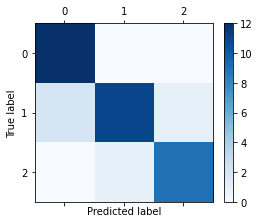

In [42]:
plt.matshow(confusion_matrix(test_y, pred_y), cmap="Blues")
plt.colorbar(shrink=0.8)
plt.xticks(range(3))
plt.yticks(range(3))
plt.xlabel("Predicted label")
plt.ylabel("True label");


We repeat the same exercise with different sizes for training and test set. Now we choose 70% of the data to include in the training set, while test the accuracy of our model on the rest of the data. 

In [43]:
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=123)

In [44]:
print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

All: [ 0.         33.14606742 39.88764045 26.96629213]
Training: [ 0.         36.29032258 42.74193548 20.96774194]
Test: [ 0.         25.92592593 33.33333333 40.74074074]


In [45]:
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    stratify=y)

print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

All: [ 0.         33.14606742 39.88764045 26.96629213]
Training: [ 0.         33.06451613 40.32258065 26.61290323]
Test: [ 0.         33.33333333 38.88888889 27.77777778]


In [47]:
tree = DecisionTreeClassifier()
tree.fit(train_X, train_y)
pred_y = tree.predict(test_X)

In [48]:
print("accuracy on the test set", tree.score(test_X, test_y))
print("accuracy on the training set", tree.score(train_X, train_y))

# using single metric functions in the sklearn.metrics package 
print("accuracy on the test set", accuracy_score(pred_y, test_y))

accuracy on the test set 0.8888888888888888
accuracy on the training set 1.0
accuracy on the test set 0.8888888888888888


In [52]:
confusion_matrix(test_y, pred_y)

array([[15,  3,  0],
       [ 1, 20,  0],
       [ 0,  2, 13]])

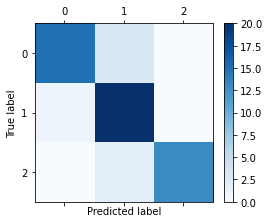

In [50]:
plt.matshow(confusion_matrix(test_y, pred_y), cmap="Blues")
plt.colorbar(shrink=0.8)
plt.xticks(range(3))
plt.yticks(range(3))
plt.xlabel("Predicted label")
plt.ylabel("True label");


With the shares of 70% : 30% the accuracy of the test changes, now only 6 out of 54 are mispredicted. 

Now, let's see how the accuracy changes with depth

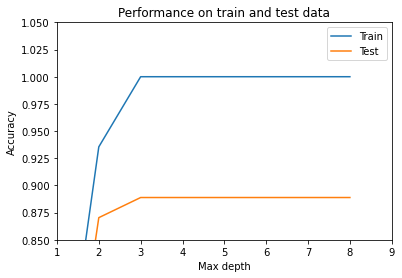

In [53]:
accuracies_train = []
accuracies_test = []
depths = range(1, 9)

for md in depths:
    model = DecisionTreeClassifier(max_depth=md)
    model.fit(train_X, train_y)
    
    accuracies_train.append(model.score(train_X, train_y))
    accuracies_test.append(model.score(test_X, test_y))

plt.plot(depths, accuracies_train, label="Train")
plt.plot(depths, accuracies_test, label="Test")
plt.title("Performance on train and test data")
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.ylim([0.85, 1.05])
plt.xlim([1,9])
plt.legend()
plt.show()

As was expected, the accuracy increases, as we increase the depth of the tree. After the value of 3, we see that there is underfitting, the accurancy doesn't increase more. And ofcourse in case of depth equal to 1, we have overfitting effect. This is in line with theory.

In [54]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree, X, y, cv=5, scoring='accuracy')
print("scores: ", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


scores:  [0.94444444 0.83333333 0.94444444 0.91428571 0.85714286]
Accuracy: 0.90 (+/- 0.09)


# Section 3: 5-Nearest-Neighbor Strategy


In this section I will solve the wine classification problem with another model called "N-Nearest Meighbors". In this case, the model classifies the wine based on its similarities with other already known wines (nearest neighbors).  I will start with 3-NN , meaning that it will decide the type of the wine based on 3 most similar neighbors. I will evaluate it with 5-fold cross-validation. 


In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=0)
print("Size of training set: {}   size of test set: {}".format(
X_train.shape[0], X_test.shape[0]))
KNN=5
knn = KNeighborsClassifier(n_neighbors=KNN)
knn.fit(X_train, y_train)

score = knn.score(X_test, y_test)

print("Score: "+str(score))
print("Parameters: " + str(KNN)+'-NN')  

Size of training set: 133   size of test set: 45
Score: 0.6666666666666666
Parameters: 5-NN


In [59]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print("scores: ", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores:  [0.72222222 0.66666667 0.63888889 0.65714286 0.77142857]
Accuracy: 0.69 (+/- 0.10)


As we get the accuracy (mean of the scores for 5-NN ) about 0.69, it makes sense to explore further to see which parameter vakue for the K (number of neighbors) gives us the best K-NN model in terms of accuracy. 

# Section 4: K-Nearest-Neighbor

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=0)
print("Size of training set: {}   size of test set: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for current_k in range(1,30,1):
    
    knn = KNeighborsClassifier(n_neighbors=current_k)
    knn.fit(X_train, y_train)

    score = knn.score(X_test, y_test)

    if score > best_score:
        best_score = score
        best_parameters = {'n_neighbors': current_k}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 133   size of test set: 45
Best score: 0.71
Best parameters: {'n_neighbors': 1}


In [61]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print("scores: ", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores:  [0.72222222 0.72222222 0.61111111 0.74285714 0.8       ]
Accuracy: 0.72 (+/- 0.12)


Our analysis above reveals that from the values ranging 1-31, K=1 gives the model with the highest accuracy, nearly 0.71.

Though the accuracy is higher, I find 1-NN models less trustworthy. This result can be clear consuquence of the fact that K-NN method was developed to work with Big data, while I have just 178 data point, which cannot classify as big data by any means. 

# Section 5: Conclusion

To predict the type of the wine give only the characteristics, I used two different model of classification: The Decision Tree and K-NN. My analyses reveals that for this certain data, the Decisio Tree gives higher accuracy than the K-NN. When working with K-NN, the highest accuracy gives 1-NN model, while when working with Decision Tree, it is better to take 70% of the data for training. 
If base my decision on accuracy, I would choose Decision Tree, as it has higher accuracy (0.87), than the 1-NN. 